# Part 1: Data Preprocessing

Dataset can be found [here](https://www.kaggle.com/datasets/adammaus/predicting-churn-for-bank-customers?select=Churn_Modelling.csv) on Kaggle.

## Importing the Libraries and Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/Churn_Modelling.csv')

## Data Exploration

In [ ]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
dataset.shape # 10k rows and 14 columns

(10000, 14)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
# check the column names containing objects (strings)
dataset.select_dtypes(include='object').columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [ ]:
# check the number of columns containing objects (strings)
len(dataset.select_dtypes(include='object').columns)

3

In [ ]:
# check the columns names containing numerical data
dataset.select_dtypes(include=['int64', 'float64']).columns

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [ ]:
# check the number of columns containing numerical data
len(dataset.select_dtypes(include=['int64', 'float64']).columns)

11

`3 columns with objects + 11 columns with numerical data = 14 columns`

In [ ]:
# statistical summary
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Dealing with Missing Data

In [ ]:
dataset.isnull().values.any() # no missing values

False

In [ ]:
dataset.isna().values.any().sum(), dataset.isnull().values.any().sum()

(0, 0)

As it is clear from the above results, there is no difference between isna() and isnull() methods. Both functions perform the same thing. isnull() is just an alias for isna().

https://medium.com/geekculture/is-there-any-distinction-between-isnull-and-isna-method-of-pandas-dataframe-47095c16f026

## Encode the Categorical Data

In [ ]:
# check the categorical features
dataset.select_dtypes(include='object').columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [ ]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# remove columns that are not statistically significant for the target value/column
dataset = dataset.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

In [ ]:
dataset

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
# check categorical features again
dataset.select_dtypes(include='object').columns

Index(['Geography', 'Gender'], dtype='object')

In [ ]:
# check unique values in the `Geography` and `Gender` columns
dataset['Geography'].unique() # 3 unique values

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
dataset['Gender'].unique() # 2 unique values

array(['Female', 'Male'], dtype=object)

In [ ]:
dataset.groupby('Geography').mean(numeric_only=True) # numeric_only=False will be the default in a future version

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Geography,,,,,,,,,
France,649.668329,38.511767,5.004587,62092.636516,1.530913,0.706621,0.516753,99899.180814,0.161548
Germany,651.453567,39.771622,5.009964,119730.116134,1.519729,0.713830,0.497409,101113.435102,0.324432
Spain,651.333872,38.890997,5.032297,61818.147763,1.539362,0.694792,0.529673,99440.572281,0.166734


In [ ]:
dataset.groupby('Gender').mean(numeric_only=True)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Gender,,,,,,,,,
Female,650.831389,39.238389,4.966102,75659.369139,1.544134,0.702619,0.502751,100601.541382,0.250715
Male,650.276892,38.658237,5.051677,77173.974506,1.518600,0.707898,0.525380,99664.576931,0.164559


In [ ]:
# one-hot-encoding for the categorical features
dataset = pd.get_dummies(data=dataset,
               drop_first=True) # drop_first removes

The `drop_first=True` parameter in `pandas.get_dummies()` function drops the first category of each categorical feature to avoid multicollinearity issues in regression models. This means that if there are n categories for a feature, only n-1 columns will be created for that feature in the resulting dataframe. The dropped column is usually the one with the lowest frequency of occurrence in the dataset.

For example, if we have a categorical feature called "color" with three categories: red, green and blue, then `pd.get_dummies(df['color'], drop_first=True)` will create two columns: "color_green" and "color_blue". The "color_red" column will be dropped because it can be inferred from the other two columns.

I hope this helps! Let me know if you have any other questions.

## Countplot

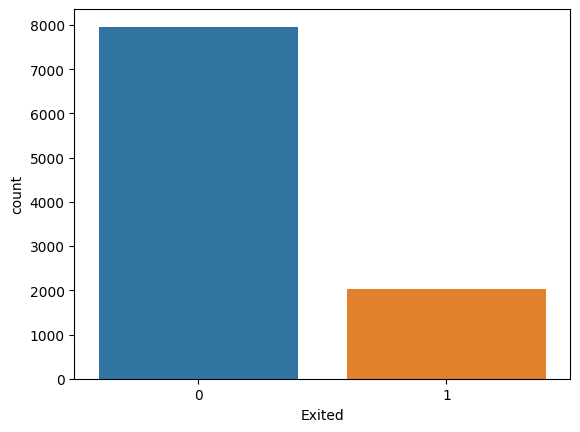

In [ ]:
sns.countplot(x=dataset['Exited'])
plt.show()

In [ ]:
# Staying with the bank
(dataset.Exited == 0).sum()

7963

In [ ]:
# Leaving the bank
(dataset.Exited == 1).sum()

2037

## Correlation Matrix and Heatmap

In [ ]:
# drop the target feature
dataset_2 = dataset.drop(columns='Exited')

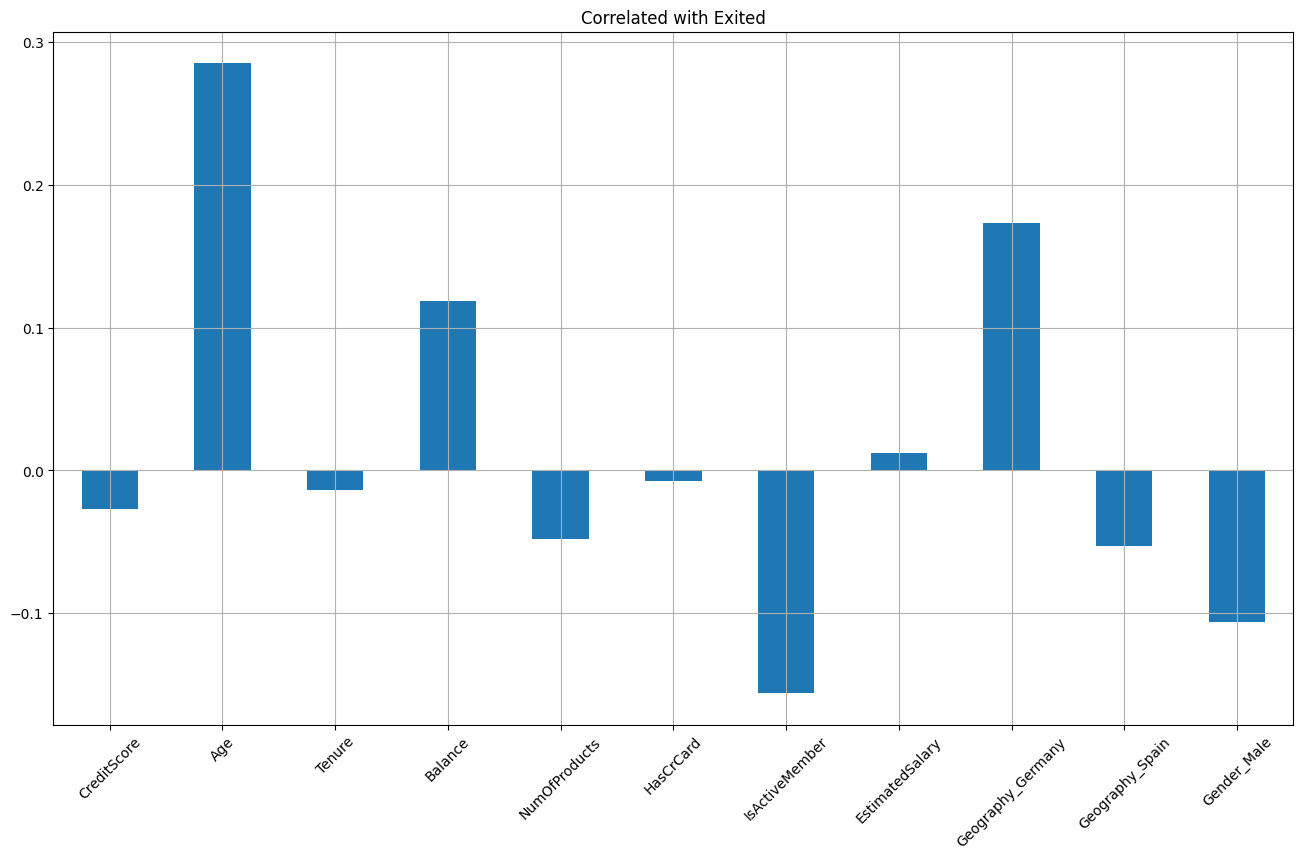

In [ ]:
dataset_2.corrwith(dataset['Exited'],
                   numeric_only=True, # optional, all categorical features are already 0/1
                  ).plot.bar(
                      figsize=(16, 9),
                      title='Correlated with Exited',
                      rot=45,
                      grid=True,
                  );

In [ ]:
corr = dataset.corr()

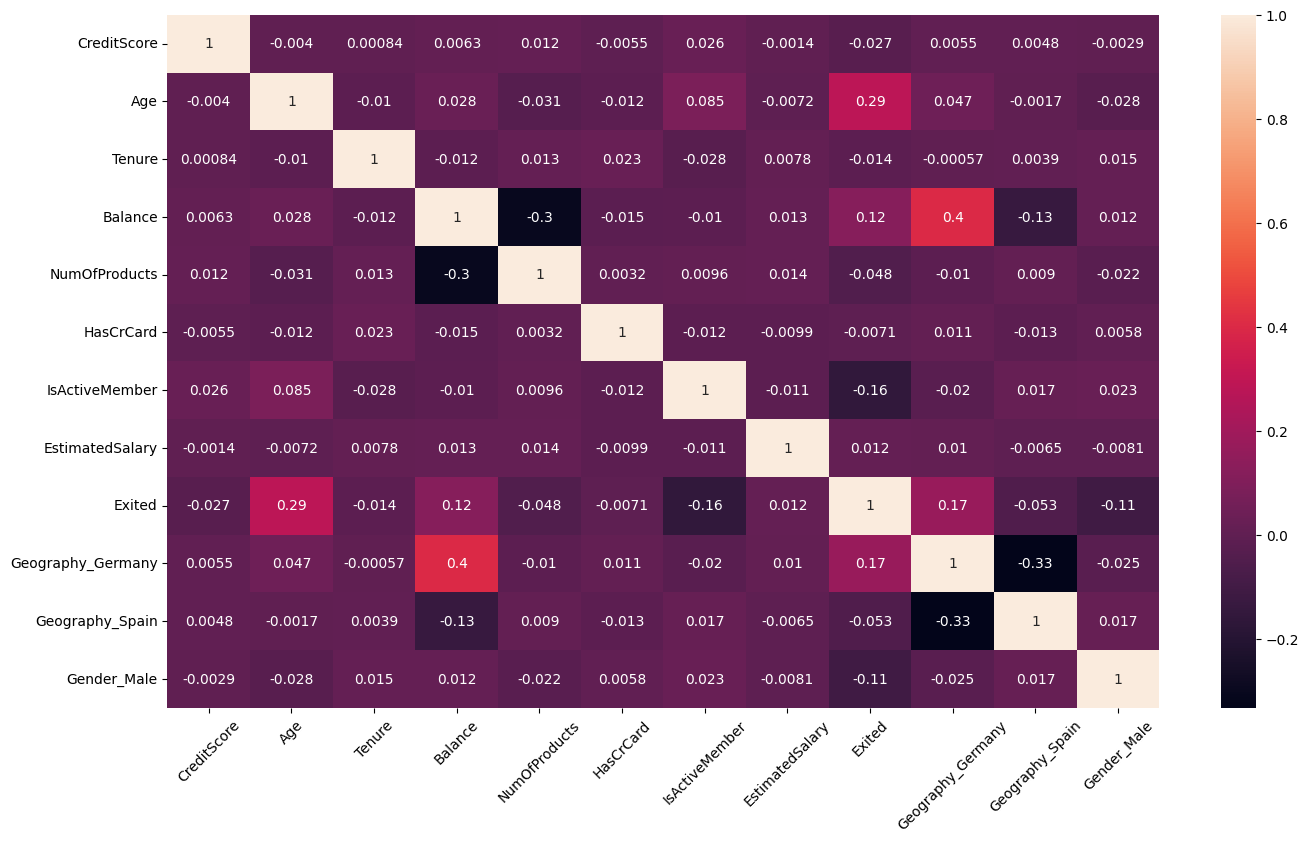

In [ ]:
plt.figure(figsize=(16, 9))
sns.heatmap(corr, annot=True)
plt.xticks(rotation=45);

## Split Dataset into Train & Test / X & y

In [ ]:
dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [ ]:
# independent variables / features
X = dataset.drop(columns='Exited')
X[:5]

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [ ]:
# dependent variable / target
y = dataset['Exited']
y[:5]

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [ ]:
# import the train_test_split class to split into X & y (train & test)
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=0)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 11), (2000, 11), (8000,), (2000,))

## Feature Scaling

In [ ]:
# import the class for standardizing the features\
# by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

In [ ]:
X_train = sc.fit_transform(X_train) # Fit to data, then transform it
X_test = sc.transform(X_test) # Perform standardization by centering and scaling

In [ ]:
X_train, X_test

(array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
          1.74309049, -1.09168714],
        [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
         -0.57369368,  0.91601335],
        [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
         -0.57369368, -1.09168714],
        ...,
        [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
         -0.57369368,  0.91601335],
        [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
          1.74309049, -1.09168714],
        [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
         -0.57369368, -1.09168714]]),
 array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
         -0.57369368, -1.09168714],
        [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
         -0.57369368, -1.09168714],
        [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
          1.74309049, -1.09168714],
        ...,
        [-0.74791227, -0.27319958, -1.37744033, ..., -

# Part 2: Building the Model

Documentation on Logistic Regression [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

## 1. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
classifier_lr = LogisticRegression(random_state=0)

In [ ]:
classifier_lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred = classifier_lr.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

In [ ]:
# Evaluate the performance
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

In [ ]:
lr_results = pd.DataFrame(
    [['Logistic Regression', acc , f1, prec, rec]],
    columns=['Model', 'Accuracy', 'F1', 'Precision', 'Recall']
)

In [ ]:
lr_results

,Model,Accuracy,F1,Precision,Recall
0,Logistic Regression,0.811,0.336842,0.581818,0.237037


In [ ]:
# Apply the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1526   69]
 [ 309   96]]


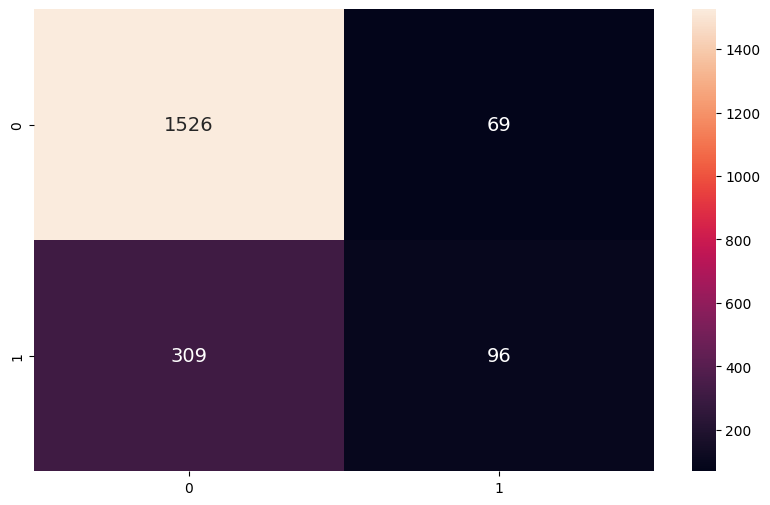

In [ ]:
plt.figure(figsize = (10,6))
sns.heatmap(cm, 
            annot=True,
            fmt='g', # avoid having `1.5e+03` numbers displayed due to `annot=True`
            # cmap='Blues',
            annot_kws={"size": 14}); # font size

### Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier_lr,
                             X=X_train,
                             y=y_train,
                             cv=10) # calculate 10 different accuracies for 10 datasets

print(f"Accuracy is {accuracies.mean()*100:.2f}%")
print(f"Standard Deviation is {accuracies.std()*100:.2f}%")

Accuracy is 80.84%
Standard Deviation is 0.88%


## 2. Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
classifier_rf = RandomForestClassifier(random_state=0)

In [ ]:
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
y_pred = classifier_rf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

In [ ]:
# Evaluate the performance
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

In [ ]:
rf_results = pd.DataFrame(
    [['Random Forest Classifier', acc , f1, prec, rec]],
    columns=['Model', 'Accuracy', 'F1', 'Precision', 'Recall']
)

In [ ]:
# results = results.append(rf_results, ignore_index=True)

In [ ]:
results = pd.concat([lr_results, rf_results])

In [ ]:
results

,Model,Accuracy,F1,Precision,Recall
0,Logistic Regression,0.811,0.336842,0.581818,0.237037
0,Random Forest Classifier,0.867,0.613372,0.745583,0.520988


In [ ]:
# Apply the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1523   72]
 [ 194  211]]


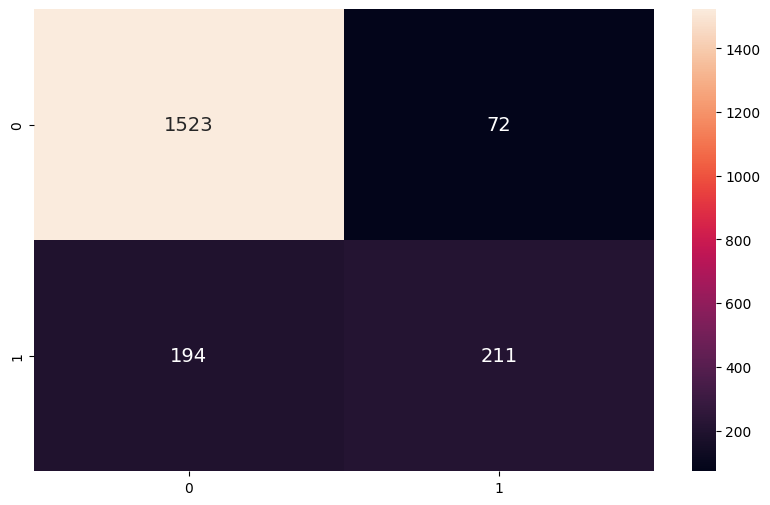

In [ ]:
plt.figure(figsize = (10,6))
sns.heatmap(cm, 
            annot=True,
            fmt='g', # avoid having `1.5e+03` numbers displayed due to `annot=True`
            annot_kws={"size": 14}); # font size

### Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier_rf,
                             X=X_train,
                             y=y_train,
                             cv=10) # calculate 10 different accuracies for 10 datasets

print(f"Accuracy is {accuracies.mean()*100:.2f}%")
print(f"Standard Deviation is {accuracies.std()*100:.2f}%")

Accuracy is 85.96%
Standard Deviation is 1.02%


> `RandomForestClassifier` is working better than the `LogisticRegression` for this dataset

**Logistic Regression**
Accuracy is 80.84%
Standard Deviation is 0.88%

vs.

**RandomForestClassifier**
Accuracy is 85.96%
Standard Deviation is 1.02%

## 3. XGBoost Classification

Documentation can be found [here](https://xgboost.readthedocs.io/en/stable/index.html).

`XGBoost` is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the `Gradient Boosting framework`. `XGBoost` provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way. The same code runs on major distributed environment (Hadoop, SGE, MPI) and can solve problems beyond billions of examples.

In [ ]:
from xgboost import XGBClassifier

In [ ]:
classifier_xgb = XGBClassifier()

In [ ]:
classifier_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
y_pred = classifier_xgb.predict(X_test)

In [ ]:
# Evaluate the performance
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

xgb_results = pd.DataFrame(
    [['XGBoost Classifier', acc , f1, prec, rec]],
    columns=['Model', 'Accuracy', 'F1', 'Precision', 'Recall']
)

results = pd.concat([lr_results, rf_results, xgb_results])
results

,Model,Accuracy,F1,Precision,Recall
0,Logistic Regression,0.8110,0.336842,0.581818,0.237037
0,Random Forest Classifier,0.8670,0.613372,0.745583,0.520988
0,XGBoost Classifier,0.8545,0.599725,0.677019,0.538272


In [ ]:
# Apply the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1491  104]
 [ 187  218]]


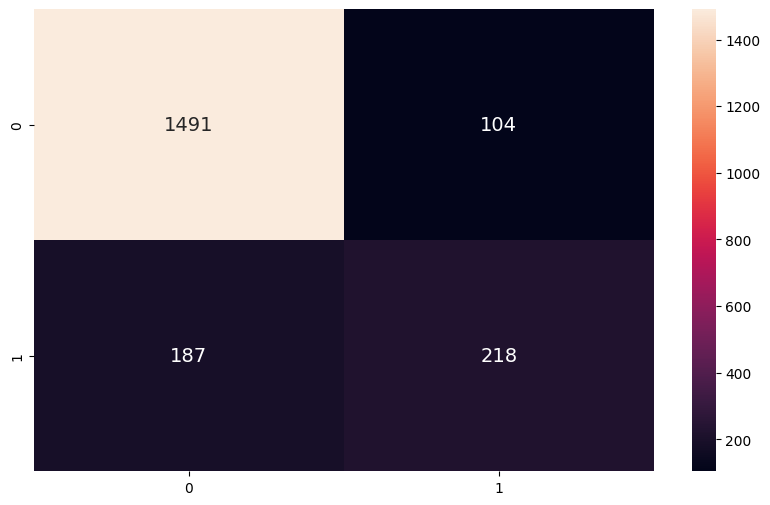

In [ ]:
plt.figure(figsize = (10,6))
sns.heatmap(cm, 
            annot=True,
            fmt='g', # avoid having `1.5e+03` numbers displayed due to `annot=True`
            annot_kws={"size": 14}); # font size

### Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier_xgb,
                             X=X_train,
                             y=y_train,
                             cv=10) # calculate 10 different accuracies for 10 datasets

print(f"Accuracy is {accuracies.mean()*100:.2f}%")
print(f"Standard Deviation is {accuracies.std()*100:.2f}%")

Accuracy is 85.24%
Standard Deviation is 1.22%


**Logistic Regression**
Accuracy is 80.84%
Standard Deviation is 0.88%

vs.

**RandomForestClassifier**
Accuracy is 85.96%
Standard Deviation is 1.02%

vs.

**XGBoost Classifier**
Accuracy is 85.24%
Standard Deviation is 1.22%

# Part 3: Randomized Search to Find the Best Parameters (XGBoost Classifier)

Documentation can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html).

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Define the parameters to use for RandomizedSearchCV `param_distributions`
parameters = {
    'learning_rate': [0.05, 0.1, 0.15, 0.20, 0.25, 0.30],
    'max_depth': [3, 4, 5, 6, 7, 8, 10, 12, 15],
    'min_child_weight': [1, 3, 5, 7],
    'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
    'colsample_bytree': [0.3, 0.4, 0.5, 0.7],
}

In [ ]:
parameters

{'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
 'max_depth': [3, 4, 5, 6, 7, 8, 10, 12, 15],
 'min_child_weight': [1, 3, 5, 7],
 'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
 'colsample_bytree': [0.3, 0.4, 0.5, 0.7]}

In [ ]:
randomized_search = RandomizedSearchCV(estimator=classifier_xgb,
                                       param_distributions=parameters,
                                       n_iter=5,
                                       n_jobs=-1,
                                       scoring='roc_auc',
                                       cv=5,
                                       verbose=3,
                                       random_state=0,
                                       )

In [ ]:
%%time
# Train the XGBoost Classifier using Randomized Search CV
randomized_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
CPU times: user 1.27 s, sys: 80.3 ms, total: 1.35 s
Wall time: 21.5 s


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   random_state=0, scoring='roc_auc', verbose=3)

In [ ]:
# Check the best estimator
randomized_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
# Check the best randomized parameters found so far
randomized_search.best_params_

{'min_child_weight': 7,
 'max_depth': 6,
 'learning_rate': 0.05,
 'gamma': 0.2,
 'colsample_bytree': 0.5}

In [ ]:
# Check the best score
randomized_search.best_score_

0.8639281371702191

# Part 4: Train the Final Model (XGBoost Classifier)

In [ ]:
%%time
from xgboost import XGBClassifier

# Instantiate the model with the best parameters found by RandomizedSearchCV
# classifier = XGBClassifier(base_score=None, booster=None, callbacks=None,
#               colsample_bylevel=None, colsample_bynode=None,
#               colsample_bytree=0.5, early_stopping_rounds=None,
#               enable_categorical=False, eval_metric=None, feature_types=None,
#               gamma=0.2, gpu_id=None, grow_policy=None, importance_type=None,
#               interaction_constraints=None, learning_rate=0.05, max_bin=None,
#               max_cat_threshold=None, max_cat_to_onehot=None,
#               max_delta_step=None, max_depth=6, max_leaves=None,
#               min_child_weight=7, monotone_constraints=None,
#               n_estimators=100, n_jobs=None, num_parallel_tree=None,
#               predictor=None, random_state=0)

classifier = XGBClassifier(colsample_bytree=0.5, 
                           gamma=0.2,
                           learning_rate=0.05,
                           max_depth=6,
                           min_child_weight=5,
                           n_estimators=200,
                           random_state=0,
                           )

# Train the model with the best parameters found by RandomizedSearchCV
classifier.fit(X_train, y_train)

CPU times: user 2.14 s, sys: 25.8 ms, total: 2.16 s
Wall time: 1.14 s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

In [ ]:
%%time
# Make predictions
y_pred = classifier.predict(X_test)

# Evaluate the performance
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

# Check the model's performance
final_xgb_results = pd.DataFrame(
    [['Final XGBoost Classifier', acc , f1, prec, rec]],
    columns=['Model', 'Accuracy', 'F1', 'Precision', 'Recall']
)

results = pd.concat([lr_results, rf_results, xgb_results, final_xgb_results])
results

CPU times: user 44 ms, sys: 964 µs, total: 44.9 ms
Wall time: 27.3 ms


,Model,Accuracy,F1,Precision,Recall
0,Logistic Regression,0.8110,0.336842,0.581818,0.237037
0,Random Forest Classifier,0.8670,0.613372,0.745583,0.520988
0,XGBoost Classifier,0.8545,0.599725,0.677019,0.538272
0,Final XGBoost Classifier,0.8630,0.601744,0.731449,0.511111


In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1519   76]
 [ 198  207]]


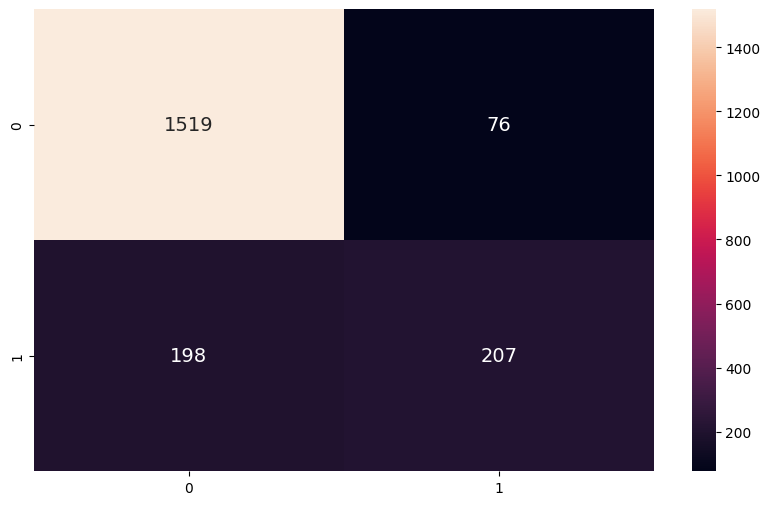

In [ ]:
plt.figure(figsize = (10,6))
sns.heatmap(cm, 
            annot=True,
            fmt='g', # avoid having `1.5e+03` numbers displayed due to `annot=True`
            annot_kws={"size": 14}); # font size

## Cross Validation

In [ ]:
%%time
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier,
                             X=X_train,
                             y=y_train,
                             cv=10) # calculate 10 different accuracies for 10 datasets

print(f"Accuracy is {accuracies.mean()*100:.2f}%")
print(f"Standard Deviation is {accuracies.std()*100:.2f}%")

Accuracy is 86.33%
Standard Deviation is 1.13%
CPU times: user 21.5 s, sys: 197 ms, total: 21.7 s
Wall time: 12.7 s


# Part 5: Predicting a Single Observation

In [ ]:
dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [ ]:
single_obs = [[619, 42, 2, 0, 1, 1, 1, 101348.88, 0, 0, 0]] # w/o `Exited` value `1` 
single_obs

[[619, 42, 2, 0, 1, 1, 1, 101348.88, 0, 0, 0]]

In [ ]:
# single_obs_feature_names = [['CreditScore', 'Age', 'Tenure', 'Balance', 
#                              'NumOfProducts', 'HasCrCard', 'IsActiveMember', 
#                              'EstimatedSalary', 'Geography_Germany', 
#                              'Geography_Spain', 'Gender_Male']] # w/o `Exited`
# single_obs_feature_names

In [ ]:
# single_obs = pd.DataFrame(
#     np.array(single_obs),
#     columns=single_obs_feature_names
# )
# single_obs

In [ ]:
classifier.predict(sc.transform(single_obs))

array([0])

In [ ]:
single_obs_1 = [[502,	42,	8, 159660.80,	3,	1,	0, 113931.57,	0, 0,	0]]
single_obs_1

[[502, 42, 8, 159660.8, 3, 1, 0, 113931.57, 0, 0, 0]]

In [ ]:
classifier.predict(sc.transform(single_obs_1))

array([1])

# Part 6: Save Model

In [ ]:
import pickle

In [ ]:
# Save the model to file
pickle.dump(classifier, open("/content/drive/MyDrive/Colab Notebooks/models/\
predicting-churn-for-bank-customers-xgboost.pkl", "wb"))

In [ ]:
# Load the saved model and make a prediction
loaded_model = pickle.load(open("/content/drive/MyDrive/Colab Notebooks/models/\
predicting-churn-for-bank-customers-xgboost.pkl", "rb"))

loaded_model.score(X_test, y_test)

0.863